In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [1]:
from PIL import Image

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

# Ensure TensorFlow and Keras versions
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

# Load the VGG model without the top (fully connected layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG layers so they are not trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
model = Sequential()
model.add(Input(shape=(224, 224, 3)))  # Explicitly add an Input layer
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 3 classes: image1, image2, image3

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data generator for reading and augmenting data from directories
train_generator = train_datagen.flow_from_directory(
   "E:\\pavan_miniproject\\train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Data generator for validation/test set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    "E:\\pavan_miniproject\\test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


TensorFlow version: 2.16.1
Keras version: 3.3.3


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 1256 images belonging to 4 classes.
Found 176 images belonging to 4 classes.
Epoch 1/10


C:\Users\moksh\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 936s 23s/step - accuracy: 0.4377 - loss: 3.3139 - val_accuracy: 0.7727 - val_loss: 0.6509
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 902s 22s/step - accuracy: 0.7820 - loss: 0.5589 - val_accuracy: 0.8580 - val_loss: 0.4302
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 942s 23s/step - accuracy: 0.8753 - loss: 0.3375 - val_accuracy: 0.8295 - val_loss: 0.4292
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 900s 22s/step - accuracy: 0.8922 - loss: 0.3090 - val_accuracy: 0.8807 - val_loss: 0.3439
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 904s 23s/step - accuracy: 0.9126 - loss: 0.2358 - val_accuracy: 0.8466 - val_loss: 0.5409
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 903s 23s/step - accuracy: 0.9020 - loss: 0.2734 - val_accuracy: 0.8977 - val_loss: 0.2974
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 931s 23s/step - accuracy: 0.9231 - loss: 0.2053 - val_accuracy: 0.8864 - val_loss: 0.3298
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 921s 23s/step - accuracy: 0.9303 - loss: 0.2038 - val_accuracy: 0.7500 - val_

In [4]:
import numpy as np
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Map predictions to class labels
class_names = list(train_generator.class_indices.keys())
predicted_labels = [class_names[i] for i in predicted_classes]

# Print the predictions
print(predicted_labels)

6/6 ━━━━━━━━━━━━━━━━━━━━ 76s 12s/step
['class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class3_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class2_new', 'class1_new', 'class2_new', 'class1_new', 'class1_new', 'class1_new', 'class2_new', 'class2_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class4_new', 'class1_new', 'class1_new', 'class1_new', 'class1_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class1_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class2_new', 'class2_n

In [5]:
model.save('vgg16_image_classifier.h5')
print("Model saved successfully.")

Model saved successfully.


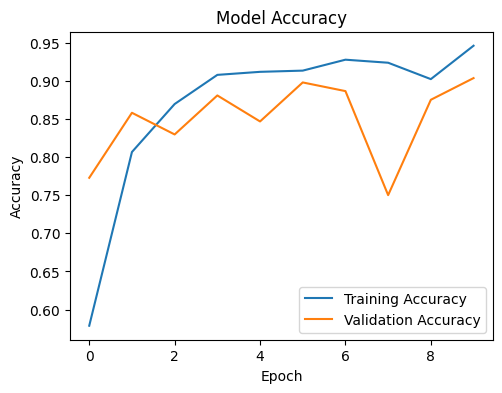

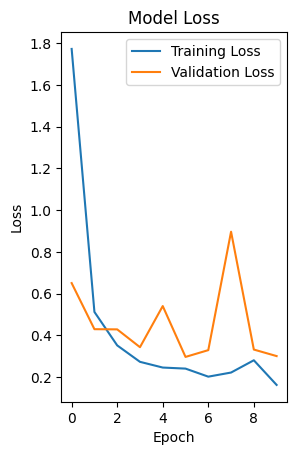

In [10]:
# 1. Accuracy and Loss Curves
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.tight_layout()
plt.savefig('accuracy_loss_curves.png')
plt.close()

6/6 ━━━━━━━━━━━━━━━━━━━━ 70s 11s/step


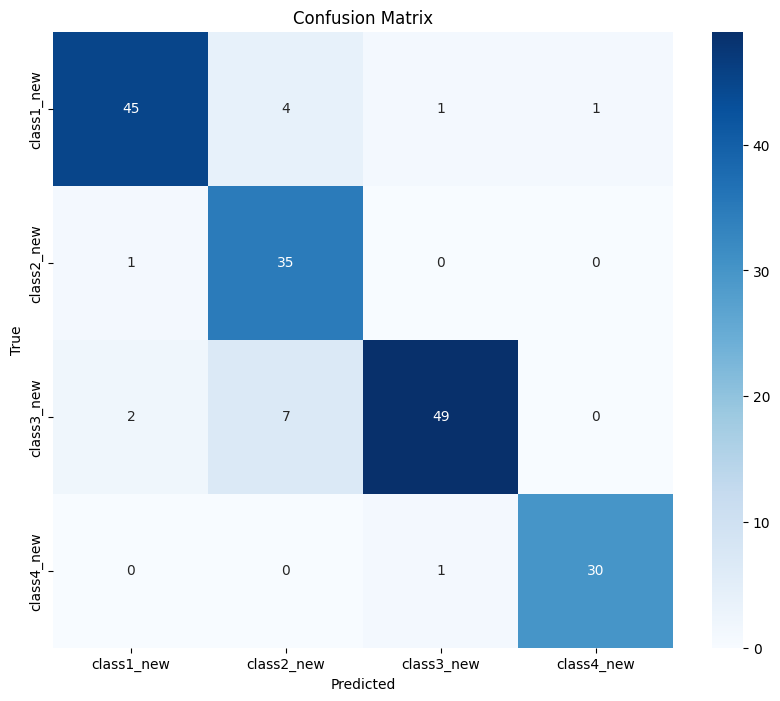

In [16]:
# 2. Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
class_names = list(train_generator.class_indices.keys())
cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()
plt.close()

In [17]:
# 3. Classification Report
print("\nClassification Report:")
print(classification_report(test_generator.classes, y_pred, target_names=class_names))



Classification Report:
              precision    recall  f1-score   support

  class1_new       0.94      0.88      0.91        51
  class2_new       0.76      0.97      0.85        36
  class3_new       0.96      0.84      0.90        58
  class4_new       0.97      0.97      0.97        31

    accuracy                           0.90       176
   macro avg       0.91      0.92      0.91       176
weighted avg       0.91      0.90      0.90       176



In [18]:
# 4. Model Summary
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,986,126 (129.65 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,847,626 (49.01 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


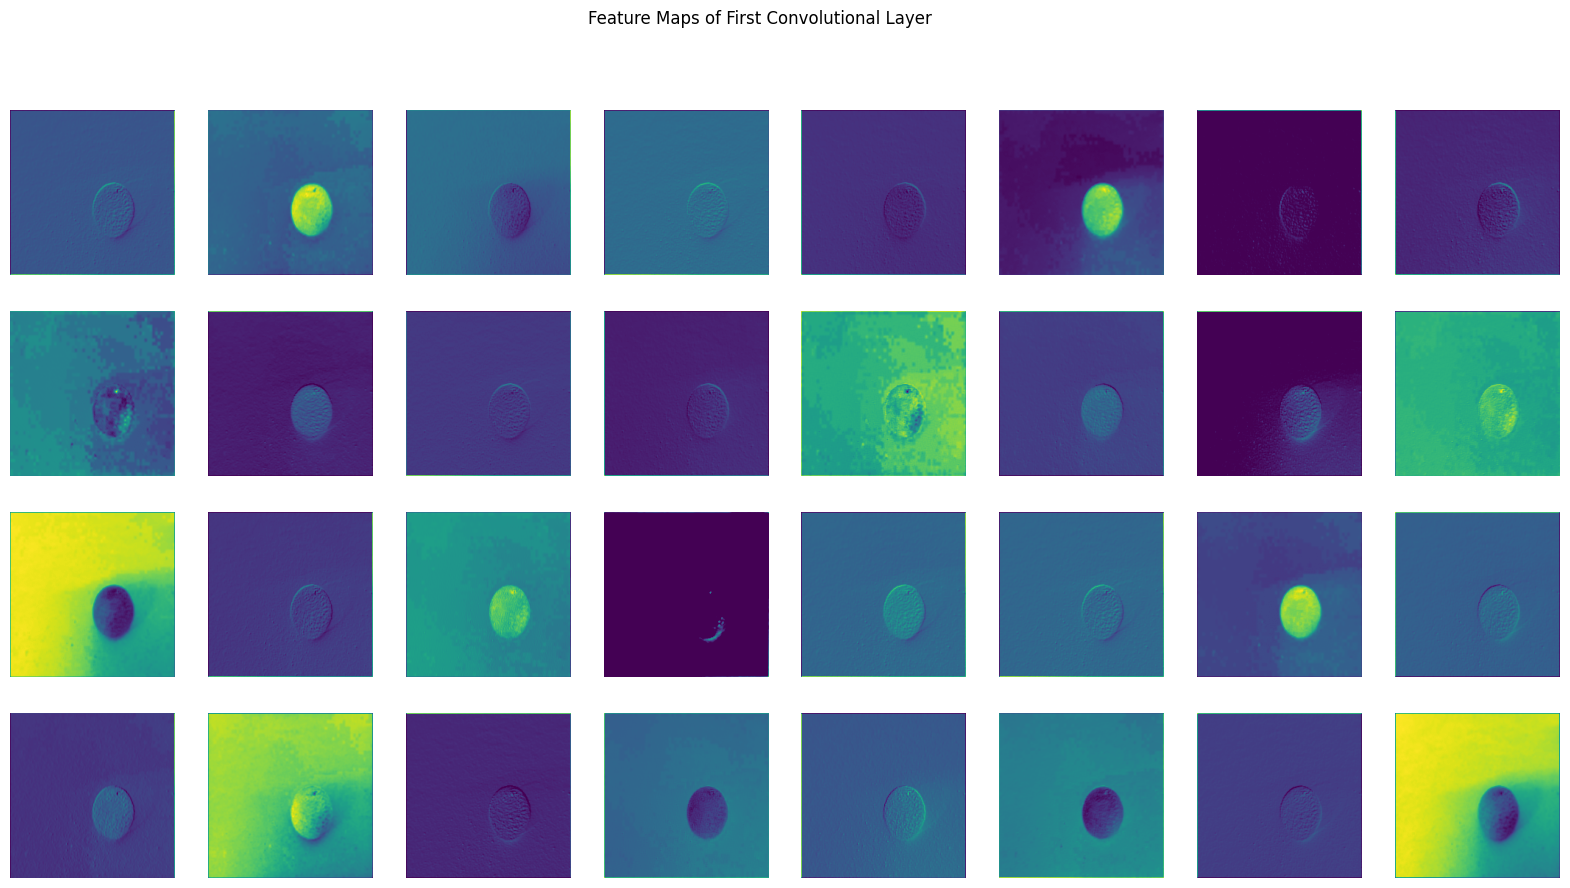

In [20]:
# 5. Feature Map Visualization (for the first convolutional layer)
first_layer = model.layers[0].layers[1]  # Assuming the first conv layer is the second layer in VGG16
feature_maps = tf.keras.models.Model(inputs=model.layers[0].inputs, outputs=first_layer.output)

img = next(test_generator)[0][0]
img = np.expand_dims(img, axis=0)
feature_map = feature_maps.predict(img)

fig, axes = plt.subplots(4, 8, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    if i < 32:  # Assuming the first layer has 64 filters, showing first 32
        ax.imshow(feature_map[0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.suptitle("Feature Maps of First Convolutional Layer")
plt.savefig('feature_maps.png')
plt.show()
plt.close()


In [ ]:
# Save model performance metrics
with open('model_performance.txt', 'w') as f:
    f.write(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}\n")
    f.write(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}\n")
    f.write(f"Final Training Loss: {history.history['loss'][-1]:.4f}\n")
    f.write(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}\n")
    f.write("\nClassification Report:\n")
    f.write(classification_report(test_generator.classes, y_pred, target_names=class_names))

print("Graphs and performance metrics have been saved.")

